In [1]:
from collections import Counter
import os

import nltk
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns

In [2]:
sns.set()

In [3]:
%matplotlib inline

In [4]:
file_list = os.listdir('data/')
l1 = sorted([f for f in file_list if len(f) == 7])
l2 = sorted([f for f in file_list if len(f) == 8])
sorted_file_list = l1 + l2

In [5]:
def assign_year(i):
    if i == 0:
        y = 2019
    elif 1 <= i <= 16:
        y = 2018
    elif 17 <= i <= 44:
        y = 2017
    elif 45 <= i <= 57:
        y = 2016
    elif 58 <= i <= 76:
        y = 2015
    elif 77 <= i <= 100:
        y = 2014
    elif 101 <= i <= 120:
        y = 2013
    elif 121 <= i <= 140:
        y = 2012
    return y

In [6]:
df = pd.DataFrame(columns=['filename', 'text', 'year'])
for i, f in enumerate(sorted_file_list):
    df.loc[i] = [f, open('data/' + f).read(), assign_year(i)]

In [7]:
df.shape

(141, 3)

In [8]:
df.head()

,filename,text,year
0,1-1.txt,\nCome have coffee with Concordia’s president\...,2019
1,1-2.txt,\nMessage from the president: 'It's been a sta...,2018
2,1-3.txt,\nMessage to the university community from Ala...,2018
3,1-4.txt,\nAlan Shepard to become president of Western ...,2018
4,1-5.txt,\nMessage from the president: ‘I’m inspired ev...,2018


In [9]:
df.text = df.text.apply(lambda x: str.lower(x) + ' ')

In [10]:
t1 = df.text.sum()

In [11]:
tokens = nltk.word_tokenize(t1)

In [12]:
my_stp = ['email', 'facebook', 'twitter', 'linkedin', 'share']
eng_stp = stopwords.words()
stp = eng_stp + my_stp
cleaned_tokens = [w for w in tokens if w not in stp and len(w) > 2]

In [13]:
c = Counter(cleaned_tokens)
c['students'] += c['student']
del c['student']

In [14]:
most_common_words = c.most_common(100)

In [15]:
most_common_words

[('concordia', 899),
 ('university', 522),
 ('shepard', 469),
 ('students', 447),
 ('president', 408),
 ('alan', 351),
 ('research', 284),
 ('new', 259),
 ('year', 215),
 ('community', 202),
 ('faculty', 192),
 ('academic', 143),
 ('story', 141),
 ('one', 134),
 ('says', 134),
 ('alumni', 131),
 ('members', 128),
 ('said', 114),
 ('canada', 113),
 ('support', 111),
 ('education', 109),
 ('teaching', 108),
 ('work', 107),
 ('learning', 101),
 ('great', 96),
 ('two', 95),
 ('strategic', 95),
 ('science', 90),
 ('quebec', 90),
 ('september', 89),
 ('staff', 88),
 ('campus', 86),
 ('time', 82),
 ('arts', 80),
 ('montreal', 80),
 ('directions', 79),
 ('board', 78),
 ('universities', 78),
 ('many', 78),
 ('innovation', 77),
 ('program', 77),
 ('well', 76),
 ('sexual', 75),
 ('future', 75),
 ('engineering', 74),
 ('years', 74),
 ('first', 72),
 ('world', 71),
 ('make', 70),
 ('funding', 70),
 ('million', 69),
 ('events', 69),
 ('government', 68),
 ('opportunities', 67),
 ('people', 67),
 ('gr

In [16]:
mc_words_lst = [w for w, freq in most_common_words]

In [17]:
bigrams = nltk.bigrams(tokens)

In [18]:
relevant_bigrams = [(a, b) for (a, b) in bigrams
                    if (a in mc_words_lst and b not in stp and len(b) > 2)
                    or (b in mc_words_lst and a not in stp and len(a) > 2)]

In [19]:
c2 = Counter(relevant_bigrams)

In [20]:
most_common_bigrams = c2.most_common(100)

In [21]:
most_common_bigrams

[(('alan', 'shepard'), 338),
 (('president', 'alan'), 127),
 (('concordia', 'president'), 80),
 (('concordia', 'university'), 57),
 (('shepard', 'president'), 55),
 (('concordia', 'community'), 52),
 (('strategic', 'directions'), 49),
 (('version', 'française'), 45),
 (('sir', 'george'), 44),
 (('story', 'version'), 44),
 (('george', 'williams'), 44),
 (('higher', 'education'), 37),
 (('sexual', 'violence'), 31),
 (('loyola', 'campus'), 31),
 (('computer', 'science'), 30),
 (('sexual', 'misconduct'), 29),
 (('academic', 'year'), 28),
 (('williams', 'campus'), 28),
 (('alumni', 'relations'), 27),
 (('graham', 'carr'), 23),
 (('next', 'generation'), 22),
 (('faculty', 'members'), 22),
 (('university', 'community'), 21),
 (('research', 'funding'), 20),
 (('graduate', 'students'), 20),
 (('graduate', 'studies'), 20),
 (('academic', 'affairs'), 19),
 (('fine', 'arts'), 18),
 (('next-generation', 'university'), 17),
 (('last', 'year'), 17),
 (('shepard', 'said'), 17),
 (('new', 'academic'), 

In [22]:
top_meaningful_words = ['students', 'research', 'community', 'faculty', 'academic', 'story', 'alumni', 'canada',
       'support', 'education', 'teaching', 'work', 'learning', 'strategic', 'quebec', 'science',
       'staff', 'campus', 'arts', 'montreal', 'universities', 'innovation',]

In [23]:
sr = pd.Series(dict((w, c[w]) for w in top_meaningful_words))

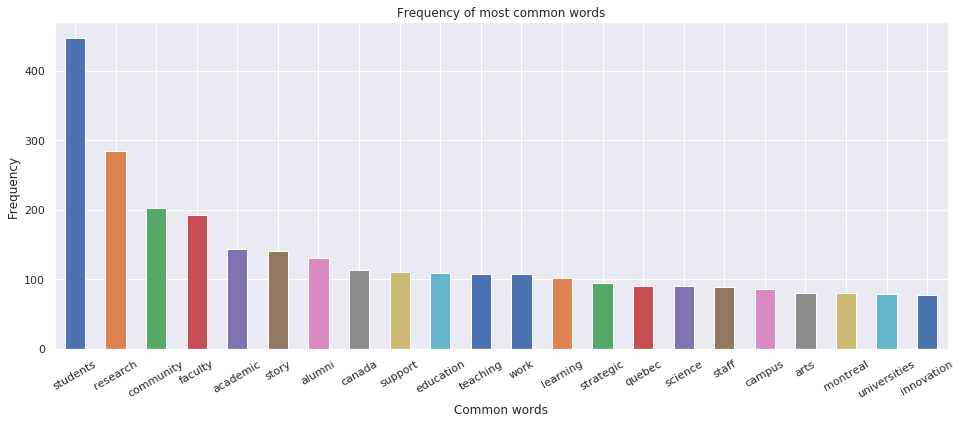

In [24]:
ax = sr.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(16,6),
    rot=30,
    title='Frequency of most common words'
)
ax.set_xlabel('Common words')
ax.set_ylabel('Frequency');

In [25]:
sr2 = df.groupby('year')['text'].sum()

In [26]:
sr2

year
2012    \npresident extends best wishes for the holida...
2013    \nmessage from concordia president about bill ...
2014    \nconcordia's president offers his holiday gre...
2015    \npresident's holiday message 2015\nwishing yo...
2016    \n9 strategic 'first moves'\nfrom experiential...
2017    \nconcordia’s president is hosting two back-to...
2018    \nmessage from the president: 'it's been a sta...
2019    \ncome have coffee with concordia’s president\...
Name: text, dtype: object

In [27]:
d = {}
for y in range(2012, 2019):
    d[y] = {}
    for w in top_meaningful_words[:5]:
        if w == 'students':
            d[y][w] = sr2[y].count('students') + sr2[y].count('student')
        else:
            d[y][w] = sr2[y].count(w)


In [28]:
df2 = pd.DataFrame(d).T

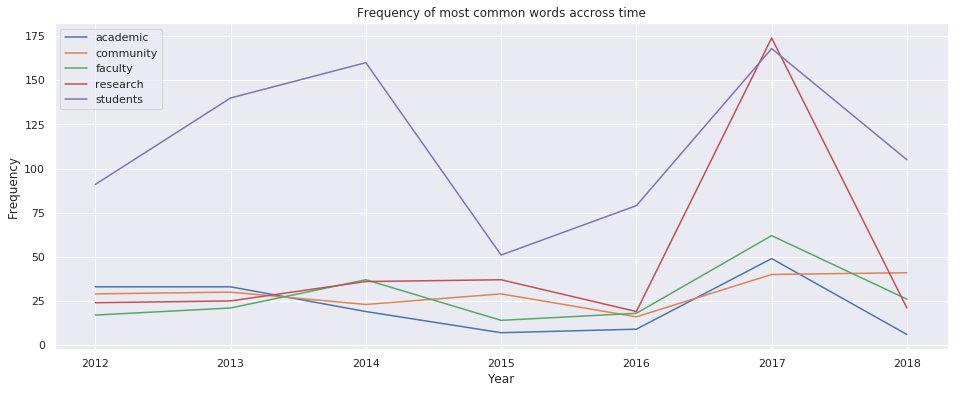

In [29]:
ax = df2.plot(figsize=(16,6), title='Frequency of most common words accross time')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency');